<Figure size 500x500 with 0 Axes>

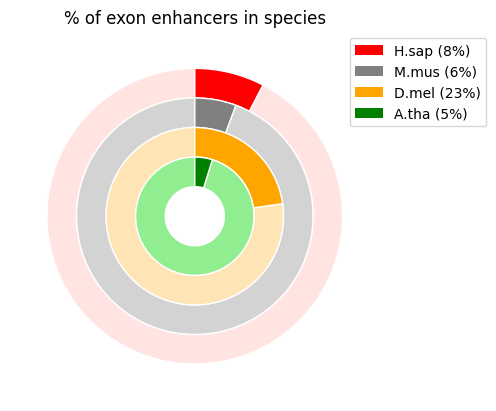

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib
from pathlib import Path
import collections
from matplotlib.patches import Patch
import seaborn as sns
from scipy.interpolate import interp1d
matplotlib.rcParams['pdf.fonttype'] = 42
from collections import Counter

plt.figure(figsize=(5, 5))

# ee on total exons merged 

# Data for four layers
data = {
    'H.sap': [100-(13481*100/176711),13481*100/176711],
    'M.mus': [100-(12244*100/217182),12244*100/217182],
    'D.mel': [100-(13688*100/60187),13688*100/60187],
    'A.tha': [100-(7138*100/148696),7138*100/148696]
}

# Colors for layers
colors = {
    'H.sap': ['mistyrose','red'],
    'M.mus': ['lightgray','gray'],
    'D.mel': ['moccasin','orange'],
    'A.tha': ['lightgreen','green']
}

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Draw each layer
for i, (layer, values) in enumerate(data.items()):
    wedges, texts = ax.pie(values, radius=1-i*0.2, colors=colors[layer], startangle=90, wedgeprops=dict(width=0.2, edgecolor='w'))

# Draw a circle at the center to make it a donut
centre_circle = plt.Circle((0,0),0.2,fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_aspect('equal')  

plt.title(label="% of exon enhancers in species", fontdict=None, loc='center', pad=None)

c1 = Patch(facecolor='red', label='H.sap ('+str(round(13481*100/176711))+"%)")
c2 = Patch(facecolor='gray', label='M.mus ('+str(round(12244*100/217182))+"%)")
c3 = Patch(facecolor='orange', label='D.mel ('+str(round(13688*100/60187))+"%)")
c4 = Patch(facecolor='green', label='A.tha ('+str(round(7138*100/148696))+"%)")

plt.legend(bbox_to_anchor=(0.9, 1),handles=[c1,c2,c3,c4])

plt.savefig("/home/mouren/Images/tls1/2.description_EE/perc_ee_all_species.pdf", format="pdf", bbox_inches="tight")


plt.show()


In [ ]:
#### Percentages of genes
### Get number of total protein coding genes 
## Tair10
#cut -d. -f1 tair10_protein_coding_id_list.txt |sort -u |wc -l   # 27628

## dm6
#grep protein_coding dm6_TranscriptDetails_UCSC_raw.tsv |awk '{print $8}' |sort -u |wc -l # 13968

## mm39
#cut -d. -f1 mm39_Coding_transcript_id.txt |sort -u > tmp
#grep -Ff tmp ensembl_geneID_transcriptID_mm39.txt |awk '{print $1}' |sort -u |wc -l #21393

## hg38
#awk '{print $2}' list_transript_gene_id_gencodeV41_tls1.tsv |cut -d. -f1 |sort -u  |wc -l #16529

list_tair_gene_ee = [] # the format of gene and transcript in tair is bla.14 "bla" is gene and "14" is transcript version
with open("/mnt/project/exonhancer/ZENODO_REPO/EE_selection/summary_files/EE_summary_tair10.tsv") as f:
    for line in f:
        gene = ((line.strip().split("\t")[3]).split("_")[0]).split(".")[0]
        if gene not in list_tair_gene_ee:
            list_tair_gene_ee.append(gene)

dic_dm6_gene = {}
with open("/mnt/project/exonhancer/ZENODO_REPO/EE_selection/other_species/data/gencode/dm6/raw/dm6_TranscriptDetails_UCSC_raw.tsv") as f:
    for line in f:
        dic_dm6_gene[line.strip().split("\t")[0]] = line.strip().split("\t")[7]

list_dm6_gene_ee = [] 
with open("/mnt/project/exonhancer/ZENODO_REPO/EE_selection/summary_files/EE_summary_dm6.tsv") as f:
    for line in f:
        gene = dic_dm6_gene[(line.strip().split("\t")[3]).split("_")[0]]
        if gene not in list_dm6_gene_ee:
            list_dm6_gene_ee.append(gene)

dic_mm39_gene1 = {}
dic_mm39_gene2 = {}
with open("/mnt/project/exonhancer/ZENODO_REPO/EE_selection/other_species/data/gencode/mm39/raw/ensembl_geneID_transcriptID_mm39.txt") as f:
    for line in f:
        dic_mm39_gene1[line.strip().split("\t")[1]] = line.strip().split("\t")[0]
        dic_mm39_gene2[(line.strip().split("\t")[1]).split(".")[0]] = line.strip().split("\t")[0]

list_mm39_gene_ee = [] 
with open("/mnt/project/exonhancer/ZENODO_REPO/EE_selection/summary_files/EE_summary_mm39.tsv") as f:
    for line in f:
        try:
            gene = dic_mm39_gene1[(line.strip().split("\t")[3]).split("_")[0]]
        except KeyError:
            try:
                gene = dic_mm39_gene2[((line.strip().split("\t")[3]).split("_")[0]).split(".")[0]]
            except KeyError:
                print(line)
                continue

        if gene not in list_mm39_gene_ee:
            list_mm39_gene_ee.append(gene)


dic_hg38_gene1 = {}
dic_hg38_gene2 = {}
with open("/mnt/project/exonhancer/ZENODO_REPO/EE_selection/hsap/list_transript_gene_id_gencodeV41_tls1.tsv") as f:
    for line in f:
        dic_hg38_gene1[line.strip().split("\t")[0]] = line.strip().split("\t")[1]
        dic_hg38_gene2[(line.strip().split("\t")[0]).split(".")[0]] = line.strip().split("\t")[1]

list_hg38_gene_ee = [] 
with open("/mnt/project/exonhancer/ZENODO_REPO/EE_selection/summary_files/EE_summary_hg38.tsv") as f:
    for line in f:
        try:
            gene = dic_hg38_gene1[(line.strip().split("\t")[3]).split("_")[0]]
        except KeyError:
            try:
                gene = dic_hg38_gene2[((line.strip().split("\t")[3]).split("_")[0]).split(".")[0]]
            except KeyError:
                print(line)
                continue

        if gene not in list_hg38_gene_ee:
            list_hg38_gene_ee.append(gene)

cano = [(len(list_hg38_gene_ee)*100)/16529,(len(list_mm39_gene_ee)*100)/21393,(len(list_dm6_gene_ee)*100)/13968,(len(list_tair_gene_ee)*100)/27628] 

<Figure size 500x500 with 0 Axes>

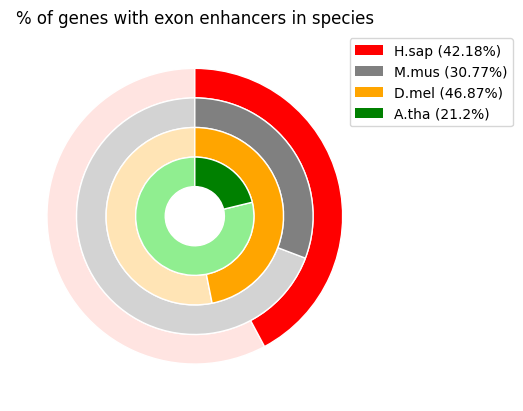

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Patch
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42

plt.figure(figsize=(5, 5))

#number of ee ensembl transcrit to ensembl genes, compared to tal number of ensemlb gene in respective assemblies 

# Data for four layers
data = {
    'H.sap': [100-(42.18),42.18],
    'M.mus': [100-(30.77),30.77],
    'D.mel': [100-(46.87),46.87],
    'A.tha': [100-(21.20),21.20]
}

# Colors for layers
colors = {
    'H.sap': ['mistyrose','red'],
    'M.mus': ['lightgray','gray'],
    'D.mel': ['moccasin','orange'],
    'A.tha': ['lightgreen','green']
}

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Draw each layer
for i, (layer, values) in enumerate(data.items()):
    wedges, texts = ax.pie(values, radius=1-i*0.2, colors=colors[layer], startangle=90, wedgeprops=dict(width=0.2, edgecolor='w'))

# Draw a circle at the center to make it a donut
centre_circle = plt.Circle((0,0),0.2,fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_aspect('equal')  

plt.title(label="% of genes with exon enhancers in species", fontdict=None, loc='center', pad=None)

c1 = Patch(facecolor='red', label='H.sap ('+str(42.18)+"%)")
c2 = Patch(facecolor='gray', label='M.mus ('+str(30.77)+"%)")
c3 = Patch(facecolor='orange', label='D.mel ('+str(46.87)+"%)")
c4 = Patch(facecolor='green', label='A.tha ('+str(21.20)+"%)")

plt.legend(bbox_to_anchor=(0.9, 1),handles=[c1,c2,c3,c4])

plt.savefig("/home/mouren/Images/tls1/2.description_EE/perc_genes_affected_all_species.pdf", format="pdf", bbox_inches="tight")


plt.show()